# **Temperature Prediction Project**

### Predict the temperature (°C) using other weather features.



## 1. Import Required Libraries

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully")

Libraries imported successfully


## 2. Load the Data

In [401]:
# Load the weather history dataset
df = pd.read_csv('Data/weatherHistory.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (96453, 12)

First few rows:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## 3. Explore Data Structure

In [402]:
# Check data types and info
print("Dataset Information:")
print(df.info())
print("Column Names:")
print(df.columns.tolist())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None
Column Names:
['Formatted Date', 'Summary',

## 4. Check for Missing Values

In [403]:
# Check for missing values
print("Missing Values Count:")
missing_values = df.isnull().sum()
print(missing_values)
print("Missing Values Percentage:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.round(2))

Missing Values Count:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
Missing Values Percentage:
Formatted Date              0.00
Summary                     0.00
Precip Type                 0.54
Temperature (C)             0.00
Apparent Temperature (C)    0.00
Humidity                    0.00
Wind Speed (km/h)           0.00
Wind Bearing (degrees)      0.00
Visibility (km)             0.00
Loud Cover                  0.00
Pressure (millibars)        0.00
Daily Summary               0.00
dtype: float64


## 5. Statistical Summary

In [404]:
# Display statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## 6. Data Cleaning

### 6.1 Remove Duplicates

In [405]:
# Create a copy for cleaning
df_clean = df.copy()

# Check for duplicates
duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")
    
print(f"\nShape after removing duplicates: {df_clean.shape}")

Number of duplicate rows: 24
Removed 24 duplicate rows

Shape after removing duplicates: (96429, 12)


### 6.2 Handle Missing Values Intelligently

In [406]:
# Check the percentage of missing Precip Type values
missing_percentage = (df_clean['Precip Type'].isnull().sum() / len(df_clean)) * 100
print(f"Missing Precip Type: {missing_percentage:.2f}% of data")

# If less than 1%, drop the missing values
if missing_percentage < 1:
    print("\nSince missing values are less than 1%, we can safely drop them.")
    df_clean = df_clean.dropna(subset=['Precip Type'])
    print(f"New shape after dropping missing values: {df_clean.shape}")

print(f"\nFinal missing values check:")
print(df_clean.isnull().sum())

Missing Precip Type: 0.54% of data

Since missing values are less than 1%, we can safely drop them.
New shape after dropping missing values: (95912, 12)

Final missing values check:
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


### 6.3 Verify Data Quality After Cleaning

In [407]:

print("FINAL CLEANED DATASET")
print(f"Shape: {df_clean.shape}")
print(f"\nData Types:")
print(df_clean.dtypes)
print(f"\nMissing Values:")
print(df_clean.isnull().sum().sum(), "total missing values")
print(f"\nPrecip Type Distribution (after cleaning):")
print(df_clean['Precip Type'].value_counts())

FINAL CLEANED DATASET
Shape: (95912, 12)

Data Types:
Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Missing Values:
0 total missing values

Precip Type Distribution (after cleaning):
Precip Type
rain    85200
snow    10712
Name: count, dtype: int64


### 6.4 Data Type Conversion

#### 6.4.1 Convert Formatted Date to Datetime

In [408]:
# Convert Formatted Date from string to datetime
print("Before conversion:")
print(f"Data type: {df_clean['Formatted Date'].dtype}")
print(f"Sample value: {df_clean['Formatted Date'].iloc[0]}")

# Convert to datetime
df_clean['Formatted Date'] = pd.to_datetime(df_clean['Formatted Date'], utc=True)

print("\n" + "="*50)
print("After conversion:")
print(f"Data type: {df_clean['Formatted Date'].dtype}")
print(f"Sample value: {df_clean['Formatted Date'].iloc[0]}")
print("\n Formatted Date converted to datetime successfully!")

Before conversion:
Data type: object
Sample value: 2006-04-01 00:00:00.000 +0200

After conversion:
Data type: datetime64[ns, UTC]
Sample value: 2006-03-31 22:00:00+00:00

 Formatted Date converted to datetime successfully!


#### 6.4.2 Verify and Categorize All Column Types

In [409]:
# Check all data types
print("DATA TYPES SUMMARY")
print(df_clean.dtypes)

print("COLUMN CATEGORIZATION")

# Categorize columns
datetime_cols = df_clean.select_dtypes(include=['datetime64']).columns.tolist()
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print(f"\n Datetime Columns ({len(datetime_cols)}):")
for col in datetime_cols:
    print(f"   - {col}")

print(f"\n Numerical Columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"   - {col}")
    
print(f"\n Categorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"   - {col}")

print("\n" + "="*60)
print(" All column types are correct!")
print("="*60)

DATA TYPES SUMMARY
Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object
COLUMN CATEGORIZATION

 Datetime Columns (0):

 Numerical Columns (8):
   - Temperature (C)
   - Apparent Temperature (C)
   - Humidity
   - Wind Speed (km/h)
   - Wind Bearing (degrees)
   - Visibility (km)
   - Loud Cover
   - Pressure (millibars)

 Categorical Columns (3):
   - Summary
   - Precip Type
   - Daily Summary

 All column types are correct!


#### 6.4.3 Convert Categorical Columns to Category Type and Drop Loud Cover

In [410]:
# dropping loud cover as it has only one value (only zero) 
df_clean.drop('Loud Cover', axis=1, inplace=True)
# Convert categorical columns to 'category' type for better memory usage
categorical_columns = ['Summary', 'Precip Type', 'Daily Summary']

print("Converting categorical columns to 'category' type:")
for col in categorical_columns:
    df_clean[col] = df_clean[col].astype('category')
    print(f"{col}: {df_clean[col].dtype}")

print("FINAL DATA TYPES:")
print(df_clean.dtypes)
print("\n All conversions completed successfully!")

Converting categorical columns to 'category' type:
Summary: category
Precip Type: category
Daily Summary: category
FINAL DATA TYPES:
Formatted Date              datetime64[ns, UTC]
Summary                                category
Precip Type                            category
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Pressure (millibars)                    float64
Daily Summary                          category
dtype: object

 All conversions completed successfully!


## 7. Exploratory Data Analysis (EDA)

## 7.1 Univariate analysis

#### 7.1.1 Checking for Skewness of the Data

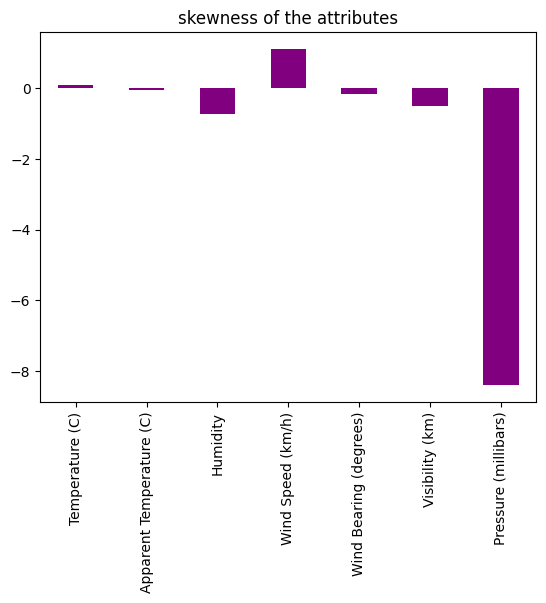

In [411]:
# checking for skewness of the data 
df_clean.select_dtypes(include=[np.number]).skew().plot(kind='bar', color='purple')
plt.title('skewness of the attributes')
plt.show()

#### 7.1.2 Checking for Outliers Through Boxplot

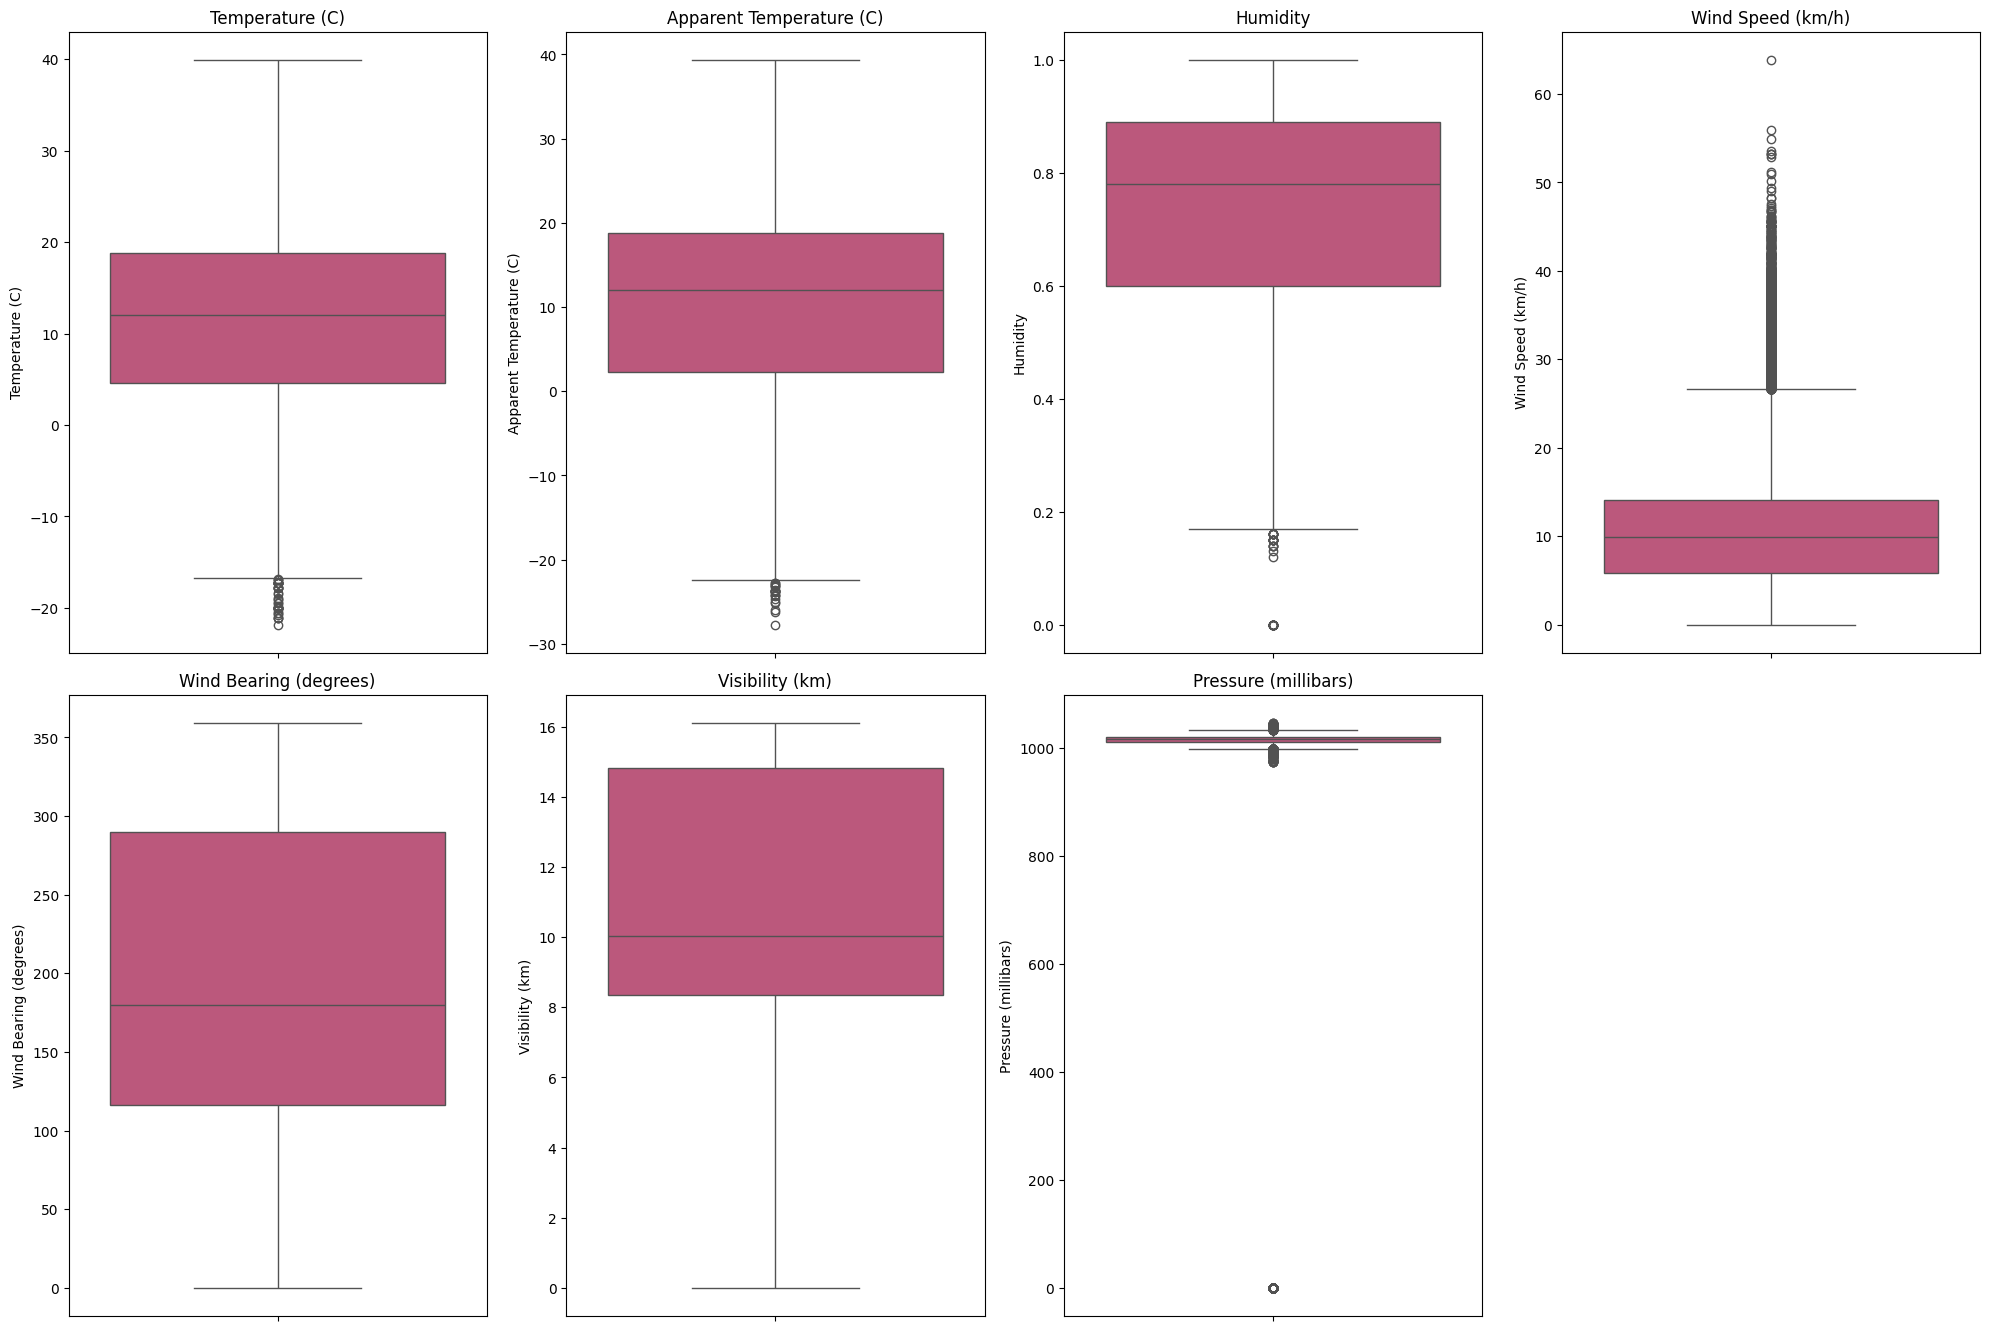

In [412]:
# checking for outliers through boxplot 

plt.figure(figsize=(20,20))

re=1
for i in df_clean.select_dtypes(include=[np.number]).columns:
    plt.subplot(3,4,re)
    sns.boxplot(df_clean[i], palette='plasma')
    plt.title(i)
    re+=1
plt.tight_layout()
plt.show()

**Observation:** Outliers are present in Temperature, Apparent Temperature, Humidity, and Wind Speed.

### 7.1.3 Explore Summary Column

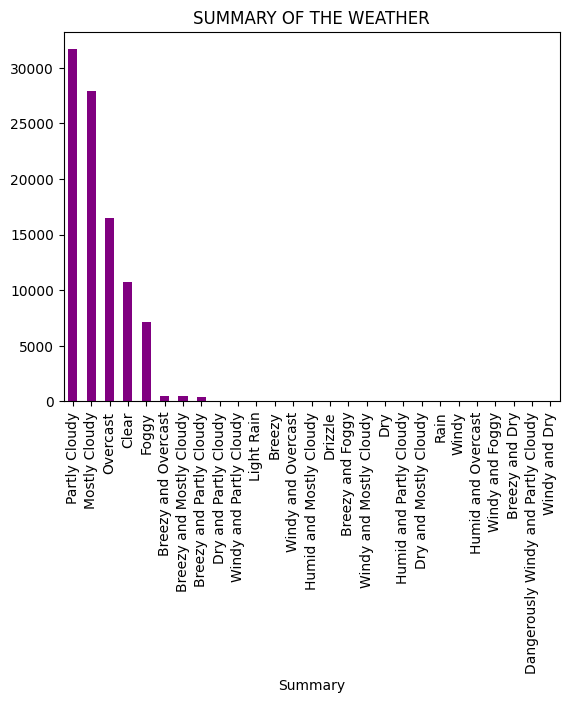

In [413]:
df_clean['Summary'].value_counts().plot(kind='bar', color='purple')
plt.title('SUMMARY OF THE WEATHER')
plt.show()


**Observation:** In the given dataset, most of the days are partly cloudy, followed by mostly cloudy, overcast, and foggy

In [414]:
df_clean['Daily Summary'].value_counts() 

Daily Summary
Mostly cloudy throughout the day.         20020
Partly cloudy throughout the day.          9930
Partly cloudy until night.                 6169
Partly cloudy starting in the morning.     5177
Foggy in the morning.                      4201
                                          ...  
Rain until afternoon.                        17
Rain until morning.                          12
Light rain in the morning.                   11
Drizzle starting in the evening.              9
Light rain overnight.                         3
Name: count, Length: 214, dtype: int64

#### Note on 'Daily Summary' Column

- The **'Daily Summary'** column is more like a description of the day.  
- Proper analysis would require **NLP techniques**.  
- Therefore, this column is **dropped from the dataframe**.


In [415]:
df_clean.drop('Daily Summary', axis=1, inplace=True)

### 7.1.4 Checking precipitation type

In [416]:
# checking precipitation type
df_clean['Precip Type'].unique()

['rain', 'snow']
Categories (2, object): ['rain', 'snow']

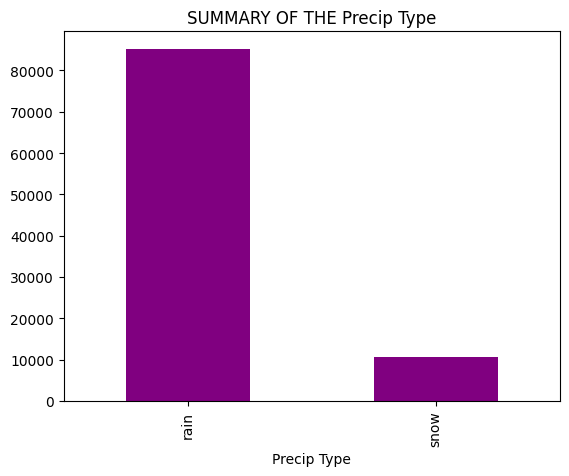

In [417]:
df_clean['Precip Type'].value_counts().plot(kind='bar', color='purple')
plt.title('SUMMARY OF THE Precip Type')
plt.show()


**Observation:** The given dataset has only two kinds of precipitation: rain and snow. Among these, most of the days experienced rain.

## 7.2 Bivariate analysis

### 7.2.1 Summary vs Precipitation Type

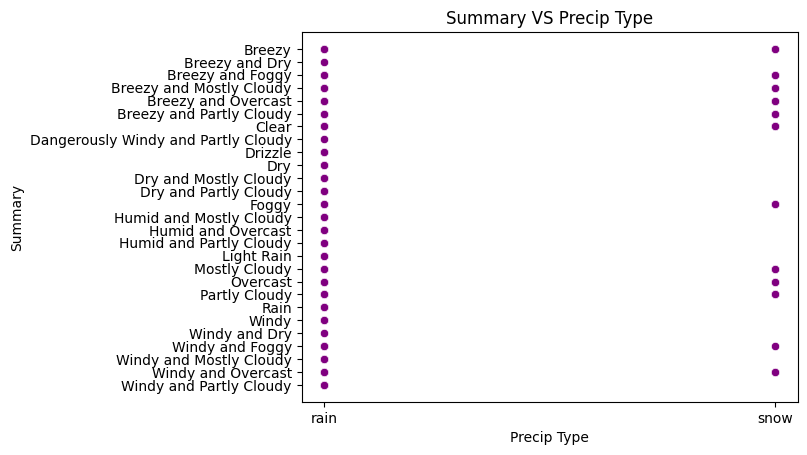

In [418]:
sns.scatterplot(y=df_clean['Summary'], x=df_clean['Precip Type'], color='Purple')
plt.title('Summary VS Precip Type')
plt.show()

#### Observation on Precipitation Types

- **Rain:**  
  - Can occur under all types of weather in the dataset.

- **Snow:**  
  - Only observed under specific conditions: cloudy, foggy, or windy days.


### 7.2.2 Precipitation type vs other variables

In [419]:
# Precip Type with all other numerical variables
df_new_num=df_clean.drop(['Formatted Date','Summary','Precip Type' ], axis=1)
df_new_num.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


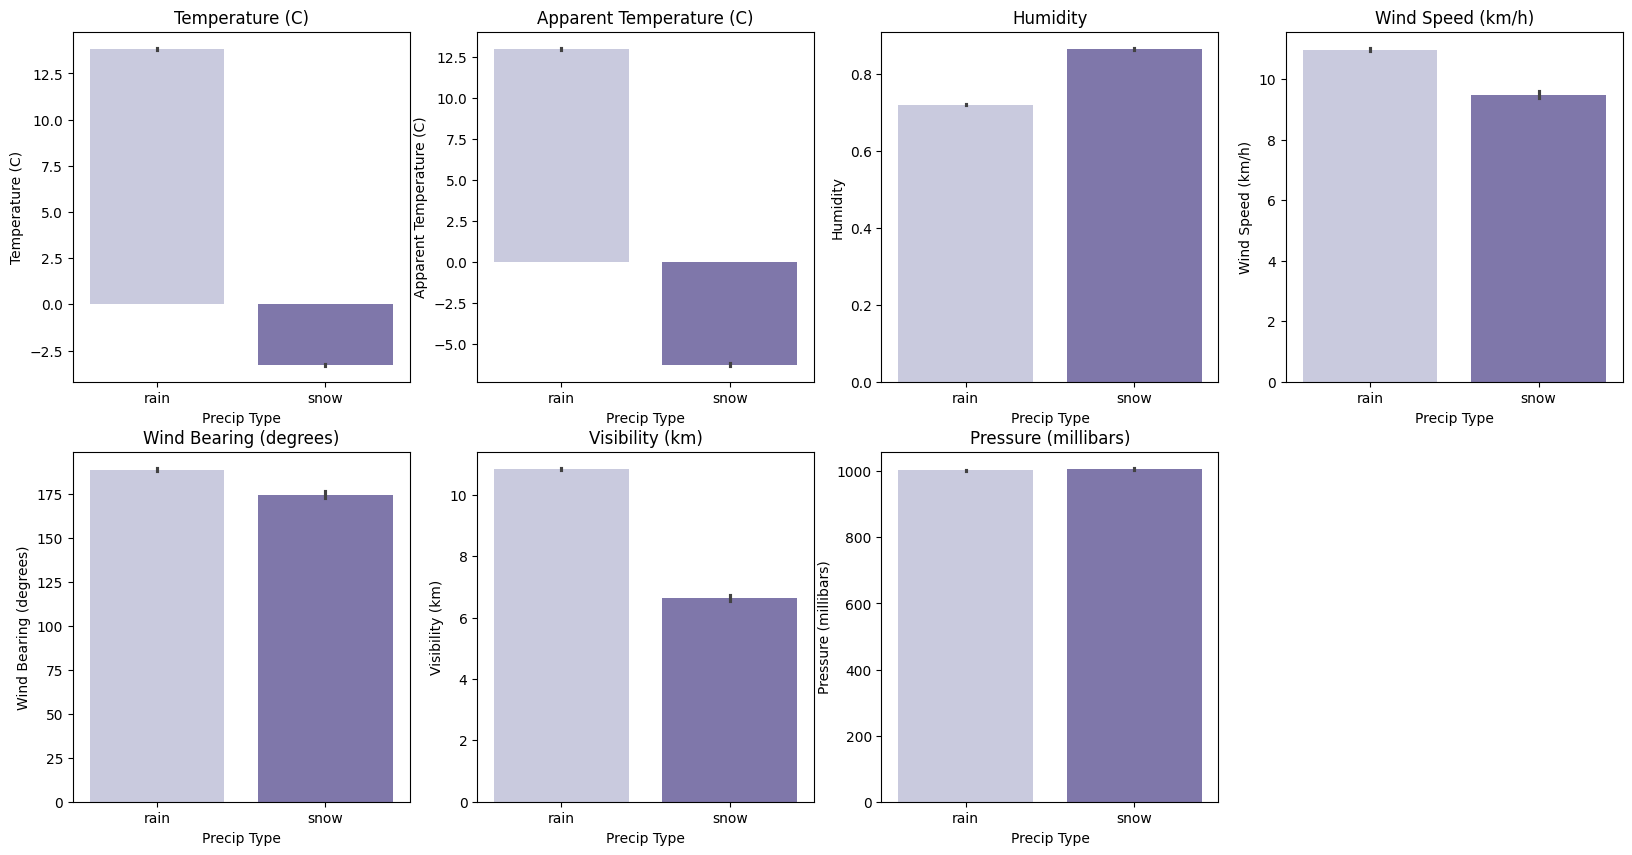

In [420]:
plt.figure(figsize=(20,10))
re=1
for i in df_new_num.columns:
    plt.subplot(2,4,re)
    sns.barplot(x=df_clean['Precip Type'], y=df_new_num[i], palette='Purples')
    re+=1
    plt.title(i)
    
plt.show()

#### Observations on Snow vs Rain

- **Temperature & Apparent Temperature:**  
  - Lower on snowy days compared to rainy days.

- **Average Humidity:**  
  - Higher on snowy days.

- **Average Wind Speed:**  
  - Lower on snowy days compared to rainy days.

- **Average Visibility:**  
  - Lower on snowy days compared to rainy days.

- **Average Pressure:**  
  - No significant difference between snowy and rainy days.


### 7.2.3 Summary vs Other Variables

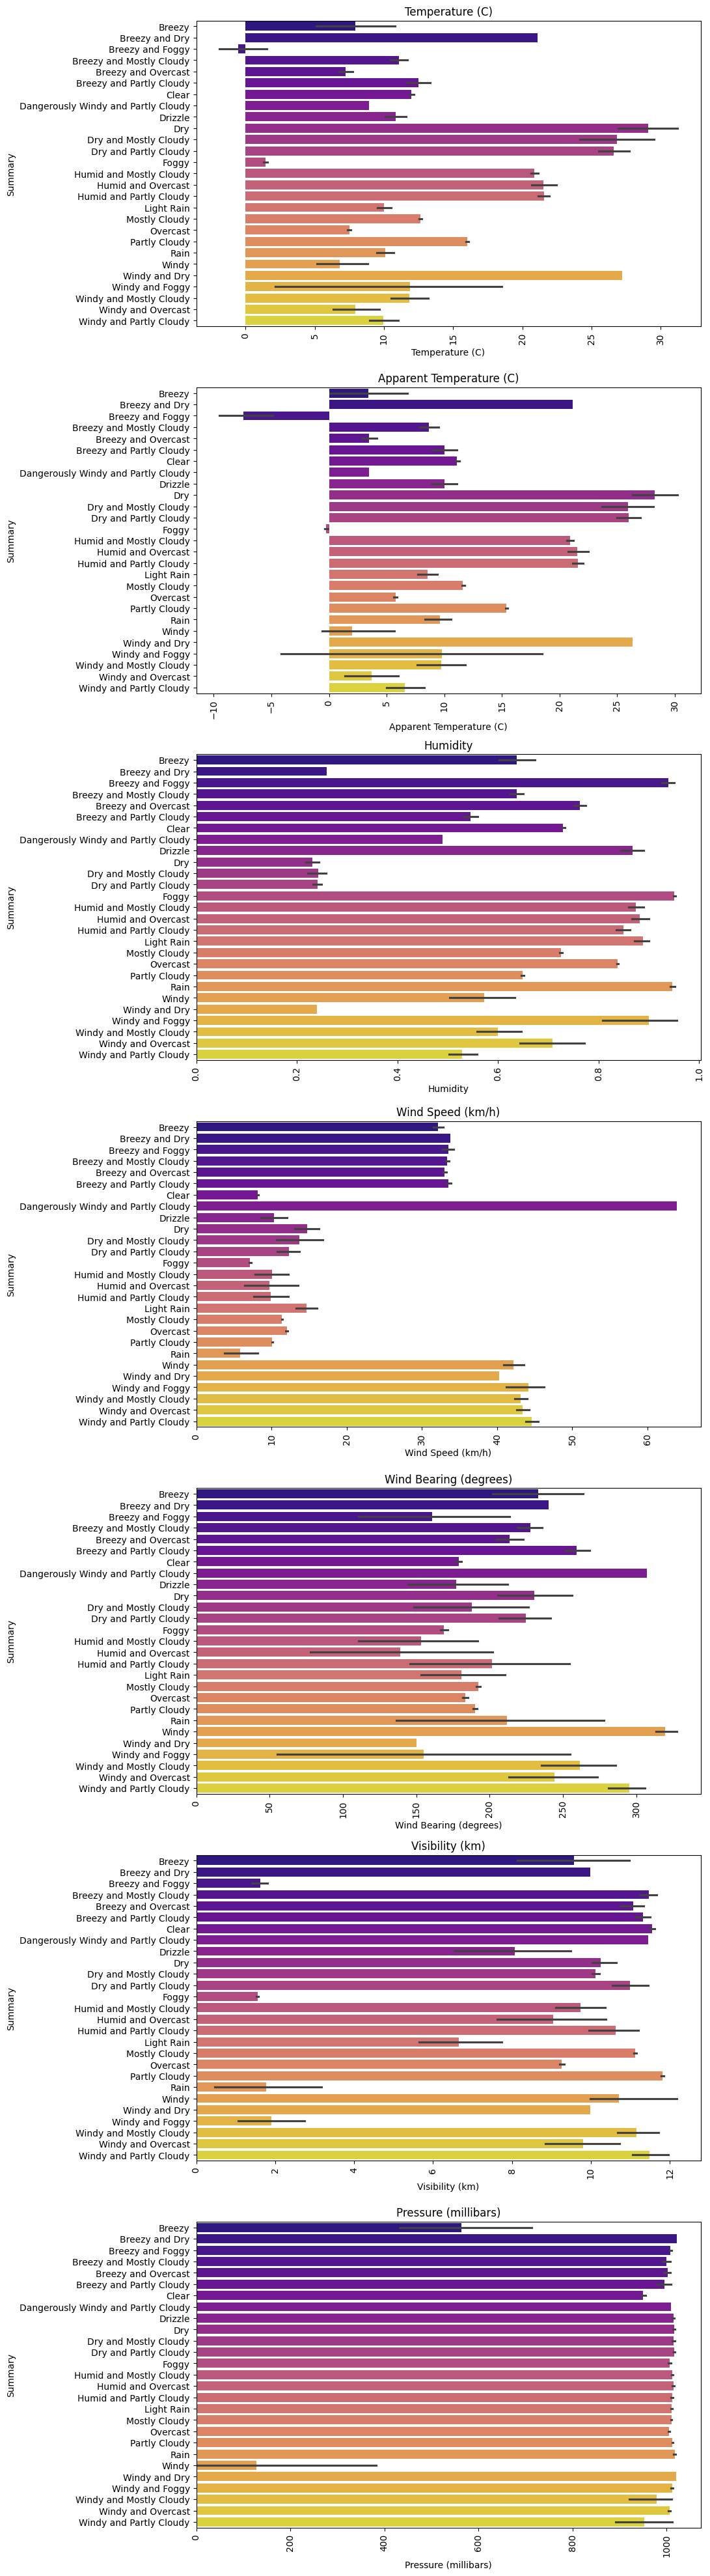

<Figure size 640x480 with 0 Axes>

In [421]:
# plotting summary vs all numerical variables 
plt.figure(figsize=(10,50))
re=1
for i in df_new_num.columns:
    plt.subplot(7,1,re)
    sns.barplot(y=df_clean['Summary'], x=df_new_num[i],palette='plasma')
    re+=1
    plt.title(i)
    plt.xticks(rotation=90)
    
plt.show()
plt.tight_layout()

#### Observations

- **Temperature:**  
  - Highest on dry days.  
  - Lowest on foggy and breezy days.

- **Humidity:**  
  - High on foggy days.

- **Wind Speed:**  
  - High on dangerously windy and partially cloudy days.

- **Visibility:**  
  - Low on foggy days.

- **Pressure:**  
  - Low on windy and breezy days.


### 7.2.4 Correlation heatmap with only numerical columns

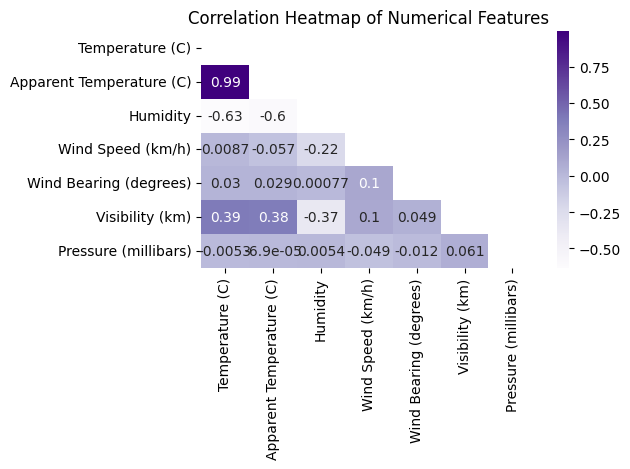

In [422]:
# correlation heatmap with only numerical columns
numerical_df = df_clean.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(), annot=True, mask=np.triu(numerical_df.corr()), cmap='Purples')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

#### Correlation Summary

#### Extremely Strong Positive Correlation
- **Temperature (C) & Apparent Temperature (C): 0.99**  
  Almost perfectly linked; when one goes up, the other goes up too.

#### Strong Negative Correlation
- **Temperature (C) & Humidity: -0.63**  
  As temperature rises, humidity usually drops, and vice versa.

#### Moderate Positive Correlations
- **Temperature (C) & Visibility (km): 0.39**  
- **Apparent Temperature (C) & Visibility (km): 0.38**  
  Warmer weather tends to slightly improve visibility.

#### Weak or Negligible Correlations
- **Wind Speed (km/h) & Humidity: 0.22** (weak positive)  
- **Pressure (millibars)**: almost no correlation with other features; fairly independent.


## 8. Feature Engineering and Encoding

### 8.1 DateTime Feature Engineering and Weather-Specific Feature Engineering

In [423]:
import pandas as pd


# copy for feature engineering
df_features = df_clean.copy()

# Extract useful datetime features
df_features['Year'] = df_features['Formatted Date'].dt.year
df_features['Month'] = df_features['Formatted Date'].dt.month
df_features['Day'] = df_features['Formatted Date'].dt.day
df_features['Hour'] = df_features['Formatted Date'].dt.hour
df_features['WeekOfYear'] = df_features['Formatted Date'].dt.isocalendar().week.astype(int)

# Season feature 
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_features['Season'] = df_features['Month'].apply(get_season)

# Time of day feature 
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_features['Time_of_Day'] = df_features['Hour'].apply(get_time_of_day)

# Temperature-related features
df_features['Temp_Apparent_Diff'] = (
    df_features['Temperature (C)'] - df_features['Apparent Temperature (C)']
)

df_features['Temp_Range_Indicator'] = pd.cut(
    df_features['Temperature (C)'],
    bins=[-50, 0, 10, 20, 30, 50],
    labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot']
)

df_features['Wind_Speed_Category'] = pd.cut(
    df_features['Wind Speed (km/h)'],
    bins=[0, 5, 15, 25, 40, 100],
    labels=['Calm', 'Light', 'Moderate', 'Strong', 'Very Strong'],
    include_lowest=True
)

df_features['Humidity_Category'] = pd.cut(
    df_features['Humidity'],
    bins=[0, 0.3, 0.6, 0.8, 1.0],
    labels=['Low', 'Moderate', 'High', 'Very High'],
    include_lowest=True
)

df_features['Pressure_Category'] = pd.cut(
    df_features['Pressure (millibars)'],
    bins=[0, 1000, 1013, 1025, 1100],
    labels=['Very Low', 'Below Normal', 'Normal', 'High'],
    include_lowest=True
)

df_features['Visibility_Category'] = pd.cut(
    df_features['Visibility (km)'],
    bins=[0, 2, 5, 10, 20],
    labels=['Poor', 'Moderate', 'Good', 'Excellent'],
    include_lowest=True
)

# Comfort index
def comfort_index(temp, humidity):
    if temp < 10:
        return 'Cold'
    elif temp > 30 and humidity > 0.7:
        return 'Hot_Humid'
    elif temp > 30:
        return 'Hot_Dry'
    elif 20 <= temp <= 25 and 0.4 <= humidity <= 0.6:
        return 'Comfortable'
    else:
        return 'Moderate'

df_features['Comfort_Index'] = df_features.apply(
    lambda row: comfort_index(row['Temperature (C)'], row['Humidity']),
    axis=1
)

print("features created successfully")
print(f"New features: {[col for col in df_features.columns if col not in df_clean.columns]}")
print(f"Current shape: {df_features.shape}")


features created successfully
New features: ['Year', 'Month', 'Day', 'Hour', 'WeekOfYear', 'Season', 'Time_of_Day', 'Temp_Apparent_Diff', 'Temp_Range_Indicator', 'Wind_Speed_Category', 'Humidity_Category', 'Pressure_Category', 'Visibility_Category', 'Comfort_Index']
Current shape: (95912, 24)


In [424]:
df_features.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Year,Month,Day,Hour,WeekOfYear,Season,Time_of_Day,Temp_Apparent_Diff,Temp_Range_Indicator,Wind_Speed_Category,Humidity_Category,Pressure_Category,Visibility_Category,Comfort_Index
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,22,13,Spring,Night,2.083333,Cold,Light,Very High,Normal,Excellent,Cold
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,23,13,Spring,Night,2.127778,Cold,Light,Very High,Normal,Excellent,Cold
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,0,13,Spring,Night,0.000000,Cold,Calm,Very High,Normal,Excellent,Cold
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,1,13,Spring,Night,2.344444,Cold,Light,Very High,Normal,Excellent,Cold
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,2,13,Spring,Night,1.777778,Cold,Light,Very High,Normal,Excellent,Cold


In [425]:
df_features.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Year                        0
Month                       0
Day                         0
Hour                        0
WeekOfYear                  0
Season                      0
Time_of_Day                 0
Temp_Apparent_Diff          0
Temp_Range_Indicator        0
Wind_Speed_Category         0
Humidity_Category           0
Pressure_Category           0
Visibility_Category         0
Comfort_Index               0
dtype: int64

### 8.2 Categorical Encoding

In [426]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Define ordinal and nominal columns
ordinal_cols = [
    'Season', 'Temp_Range_Indicator', 'Wind_Speed_Category', 'Time_of_Day',
    'Humidity_Category', 'Pressure_Category', 'Visibility_Category',
    'Comfort_Index'
]

nominal_cols = ['Precip Type', 'Summary']

# Create a copy for encoding
df_encoded = df_features.copy()

print("Columns to encode:")
print(f"Ordinal columns: {ordinal_cols}")
print(f"Nominal columns: {nominal_cols}")

# Check if all columns exist in the dataframe
missing_cols = [col for col in ordinal_cols + nominal_cols if col not in df_encoded.columns]
if missing_cols:
    print(f"Warning: Missing columns: {missing_cols}")
else:
    print("All columns found in df")

Columns to encode:
Ordinal columns: ['Season', 'Temp_Range_Indicator', 'Wind_Speed_Category', 'Time_of_Day', 'Humidity_Category', 'Pressure_Category', 'Visibility_Category', 'Comfort_Index']
Nominal columns: ['Precip Type', 'Summary']
All columns found in df


#### 8.2.1 Ordinal Encoding

In [ ]:
# Define custom ordinal mappings with logical ordering
ordinal_mappings = {
    'Season': ['Winter', 'Spring', 'Summer', 'Autumn'],
    'Temp_Range_Indicator': ['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot'],
    'Wind_Speed_Category': ['Calm', 'Light', 'Moderate', 'Strong', 'Very Strong'],
    'Time_of_Day': ['Night', 'Morning', 'Afternoon', 'Evening'],
    'Humidity_Category': ['Low', 'Moderate', 'High', 'Very High'],
    'Pressure_Category': ['Very Low', 'Below Normal', 'Normal', 'High'],
    'Visibility_Category': ['Poor', 'Moderate', 'Good', 'Excellent'],
    'Comfort_Index': ['Cold', 'Moderate', 'Comfortable', 'Hot_Dry', 'Hot_Humid']
}

# Apply ordinal encoding for each column with custom mapping
for col in ordinal_cols:
    if col in df_encoded.columns:
        print(f"\nEncoding {col}:")
        print(f"Original values: {df_encoded[col].unique()}")
        
        # Create ordinal encoder with custom categories
        ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col]], 
                                       handle_unknown='use_encoded_value', 
                                       unknown_value=-1)
        
        df_encoded[col + '_encoded'] = ordinal_encoder.fit_transform(df_encoded[[col]]).astype(int)
        
        print(f"Encoded values: {sorted(df_encoded[col + '_encoded'].unique())}")
        print(f"Mapping: {dict(zip(ordinal_mappings[col], range(len(ordinal_mappings[col]))))}")

print("Ordinal encoding completed!")



Encoding Season:
Original values: ['Spring' 'Summer' 'Autumn' 'Winter']
Encoded values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Mapping: {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}

Encoding Temp_Range_Indicator:
Original values: ['Cold', 'Mild', 'Warm', 'Hot', 'Very Cold']
Categories (5, object): ['Very Cold' < 'Cold' < 'Mild' < 'Warm' < 'Hot']
Encoded values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Mapping: {'Very Cold': 0, 'Cold': 1, 'Mild': 2, 'Warm': 3, 'Hot': 4}

Encoding Wind_Speed_Category:
Original values: ['Light', 'Calm', 'Moderate', 'Strong', 'Very Strong']
Categories (5, object): ['Calm' < 'Light' < 'Moderate' < 'Strong' < 'Very Strong']
Encoded values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Mapping: {'Calm': 0, 'Light': 1, 'Moderate': 2, 'Strong': 3, 'Very Strong': 4}

Encoding Time_of_Day:
Original values: ['Night' 'Morning' 'Afternoon' 'Evening']
Encoded values: [np.int64(0), np.int64(1), np.int

#### 8.2.2 One-Hot Encoding for Nominal Variables

In [428]:
# Apply One-Hot Encoding for nominal variables
for col in nominal_cols:
    if col in df_encoded.columns:
        print(f"\nOne-Hot Encoding {col}:")
        print(f"Original values: {df_encoded[col].unique()}")
        
        # Create dummy variables
        dummies = pd.get_dummies(df_encoded[col], prefix=col.replace(' ', '_'), drop_first=False)
        
        # Add dummy variables to dataframe
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        
        print(f"Created columns: {list(dummies.columns)}")

print("One-Hot encoding completed")



One-Hot Encoding Precip Type:
Original values: ['rain', 'snow']
Categories (2, object): ['rain', 'snow']
Created columns: ['Precip_Type_rain', 'Precip_Type_snow']

One-Hot Encoding Summary:
Original values: ['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy', 'Breezy and Mostly Cloudy', ..., 'Drizzle', 'Windy and Dry', 'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain']
Length: 27
Categories (27, object): ['Breezy', 'Breezy and Dry', 'Breezy and Foggy', 'Breezy and Mostly Cloudy', ..., 'Windy and Foggy', 'Windy and Mostly Cloudy', 'Windy and Overcast', 'Windy and Partly Cloudy']


Created columns: ['Summary_Breezy', 'Summary_Breezy and Dry', 'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy', 'Summary_Clear', 'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy', 'Summary_Dry and Partly Cloudy', 'Summary_Foggy', 'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast', 'Summary_Humid and Partly Cloudy', 'Summary_Light Rain', 'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy', 'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry', 'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy', 'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy']
One-Hot encoding completed


In [429]:
df_encoded.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Year,Month,Day,Hour,WeekOfYear,Season,Time_of_Day,Temp_Apparent_Diff,Temp_Range_Indicator,Wind_Speed_Category,Humidity_Category,Pressure_Category,Visibility_Category,Comfort_Index,Season_encoded,Temp_Range_Indicator_encoded,Wind_Speed_Category_encoded,Time_of_Day_encoded,Humidity_Category_encoded,Pressure_Category_encoded,Visibility_Category_encoded,Comfort_Index_encoded,Precip_Type_rain,Precip_Type_snow,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,22,13,Spring,Night,2.083333,Cold,Light,Very High,Normal,Excellent,Cold,1,1,1,0,3,2,3,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,23,13,Spring,Night,2.127778,Cold,Light,Very High,Normal,Excellent,Cold,1,1,1,0,3,2,3,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,0,13,Spring,Night,0.000000,Cold,Calm,Very High,Normal,Excellent,Cold,1,1,0,0,3,2,3,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,1,13,Spring,Night,2.344444,Cold,Light,Very High,Normal,Excellent,Cold,1,1,1,0,3,2,3,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,2,13,Spring,Night,1.777778,Cold,Light,Very High,Normal,Excellent,Cold,1,1,1,0,3,2,3,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
